<a href="https://colab.research.google.com/github/malisumit86/Clock/blob/master/Final%20Code%20PBS%20(TRANSLATION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Phase.
---



1) Installing Necessary Packages.

In [ ]:
!pip install pytesseract
from PIL import Image
import pytesseract
import PIL


In [ ]:
!pip install tesseract
! apt install tesseract-ocr
! apt install libtesseract-dev
! pip install Pillow
!sudo apt install tesseract-ocr

2) Installing 20 Languages from tesseract.

In [ ]:
# ---------------INDIAN 10 -------------
!apt-get install tesseract-ocr-hin
!apt-get install tesseract-ocr-mar
!apt-get install tesseract-ocr-san
!apt-get install tesseract-ocr-ben
!apt-get install tesseract-ocr-guj
!apt-get install tesseract-ocr-pan
!apt-get install tesseract-ocr-tam
!apt-get install tesseract-ocr-tel
!apt-get install tesseract-ocr-kan
!apt-get install tesseract-ocr-asam
#---------------FOREIGN 10 -------------
!apt-get install tesseract-ocr-eng
!apt-get install tesseract-ocr-spa
!apt-get install tesseract-ocr-rus
!apt-get install tesseract-ocr-por
!apt-get install tesseract-ocr-ita
!apt-get install tesseract-ocr-gre
!apt-get install tesseract-ocr-fra
!apt-get install tesseract-ocr-jer
!apt-get install tesseract-ocr-nep
!apt-get install tesseract-ocr-lta



3) Import PIL packages,cv,matplotlib.

In [ ]:
from PIL import ImageEnhance, ImageFilter, Image

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt

Phase I) DETECT & EXTRACT
---





4) Provide Path for Tesseract-OCR 4.

In [ ]:
pytesseract.pytesseract.tesseract_cmd = ( r'/usr/bin/tesseract' )

5) Array of Languages.

In [ ]:
languages = ['hin','mar','san','ben','guj','pan','tam','tel','kan','asam','eng','spa','rus','por','ita','gre','fra','jer','nep','lta']
lang_string = '+'.join(languages)

6) Provide Source Image.

In [ ]:
src_img = "French.PNG"

7) Read Image by OpenCV.

In [ ]:
img = cv2.imread(src_img)

8) Display Loaded Image.

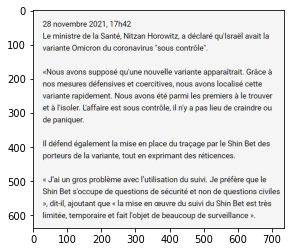

In [ ]:
plt.imshow(img)

9) Getting Width & Height of Image.

In [ ]:
imgH, imgW,_ = img.shape

10) Returns result containing recognized characters and their box boundaries

In [ ]:
imgbox = pytesseract.image_to_boxes((src_img), lang = lang_string)

11) Rectangle Draw by getting x,y,w,h Coordinates.

In [ ]:
for boxes in imgbox.splitlines():
    boxes = boxes.split(' ')
    x,y,w,h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    cv2.rectangle(img,(x,imgH-y),(w,imgH-h),(231, 76, 60),3)

12) Display Detected Text on the Source Image.

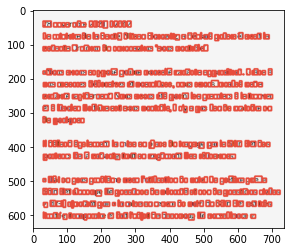

In [ ]:
plt.imshow(img)

**13**) Returns unmodified output as string from Tesseract OCR processing.

In [ ]:
img2char = pytesseract.image_to_string(src_img, lang = lang_string)

14) Display Fully Automatic Extracted Text From Source Image.

In [ ]:
print(img2char)

28 novembre 2021, 17h42
Le ministre de la Santé, Nitzan Horowitz, a déclaré qu'Israël avait la
variante Omicron du coronavirus "sous contrôle”.

«Nous avons supposé qu'une nouvelle variante apparaitrait. Grâce à
nos mesures défensives et coercitives, nous avons localisé cette
variante rapidement. Nous avons été parmi les premiers à le trouver
et à l'isoler. L'affaire est sous contrôle, il n'y a pas lieu de craindre ou
de paniquer.

Il défend également la mise en place du traçage par le Shin Bet des
porteurs de la variante, tout en exprimant des réticences.

« J'ai un gros problème avec l'utilisation du suivi. Je préfère que le

Shin Bet s'occupe de questions de sécurité et non de questions civiles
», di
limitée, temporaire et fait l'objet de beaucoup de surveillance ».

  

il, ajoutant que « la mise en œuvre du suivi du Shin Bet est très



15) Shows Rectangle 4 Coordinates.

In [ ]:
# print(imgbox)

Phase II) Recognise Text Language
---



16) Detect Text Language.

In [ ]:
"""
!pip install polyglot
!pip install PyICU
!pip install pycld2
!pip install morfessor
import polyglot

"""


#pip install morfessor

'\n!pip install polyglot\n!pip install PyICU\n!pip install pycld2\n!pip install morfessor\nimport polyglot\n\n'

In [ ]:
from polyglot.text import Text, Word
test = Text(img2char)

In [ ]:
detectedLangName = test.language.name
detectedLangCode = test.language.code

print(detectedLangCode)
print(detectedLangName)
print(type(detectedLangName))

fr
French
<class 'str'>


Phase III) Translate Langauge.
---



Translate Text

1) Import Packages


In [ ]:
#  !pip install googletrans==3.1.0a0

import googletrans
from googletrans import Translator


2) initialize the Translator

In [ ]:
translator = Translator()

3) Now, ask the user to enter the text to translate by the Google Translator

In [ ]:
str = input("Enter Language name [Translated to] -> ")
str = str.strip()
if (str.isalpha()):
  key_list = list(googletrans.LANGUAGES.keys())
  val_list = list(googletrans.LANGUAGES.values())
  position = val_list.index(str.lower())
  translated_to = key_list[position]
else:
  print("Please Enter Valid Input.")

Enter Language name [Translated to] -> Marathi


4) Getting Source Lang and Transletting into Desire Language

In [ ]:
source_lan = detectedLangCode

# translator = Translator(service_urls=['translate.googleapis.com'])

translated_text = translator.translate(img2char,translated_to,source_lan)

print("------------------------------------------------------------------------")
print(f"Extracted Language is : -> {detectedLangName}\n\n{img2char}")
print("------------------------------------------------------------------------")
print(f"The Translated Text is: {str}\n\n{translated_text.text}")
print("------------------------------------------------------------------------")
# print(f"The Translated Text pronunciation is {translated_text.pronunciation}")

------------------------------------------------------------------------
Extracted Language is : -> French

28 novembre 2021, 17h42
Le ministre de la Santé, Nitzan Horowitz, a déclaré qu'Israël avait la
variante Omicron du coronavirus "sous contrôle”.

«Nous avons supposé qu'une nouvelle variante apparaitrait. Grâce à
nos mesures défensives et coercitives, nous avons localisé cette
variante rapidement. Nous avons été parmi les premiers à le trouver
et à l'isoler. L'affaire est sous contrôle, il n'y a pas lieu de craindre ou
de paniquer.

Il défend également la mise en place du traçage par le Shin Bet des
porteurs de la variante, tout en exprimant des réticences.

« J'ai un gros problème avec l'utilisation du suivi. Je préfère que le

Shin Bet s'occupe de questions de sécurité et non de questions civiles
», di
limitée, temporaire et fait l'objet de beaucoup de surveillance ».

  

il, ajoutant que « la mise en œuvre du suivi du Shin Bet est très

---------------------------------------